In [22]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from scipy import stats

In [23]:
df = pd.read_csv('flight.csv')
df.head() 

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [25]:
df.describe( )

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [26]:
df.dropna(inplace = True)

In [27]:
df.isnull().sum() 

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [28]:
df.duplicated().sum( )

0

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)  
num = newdf.keys() 

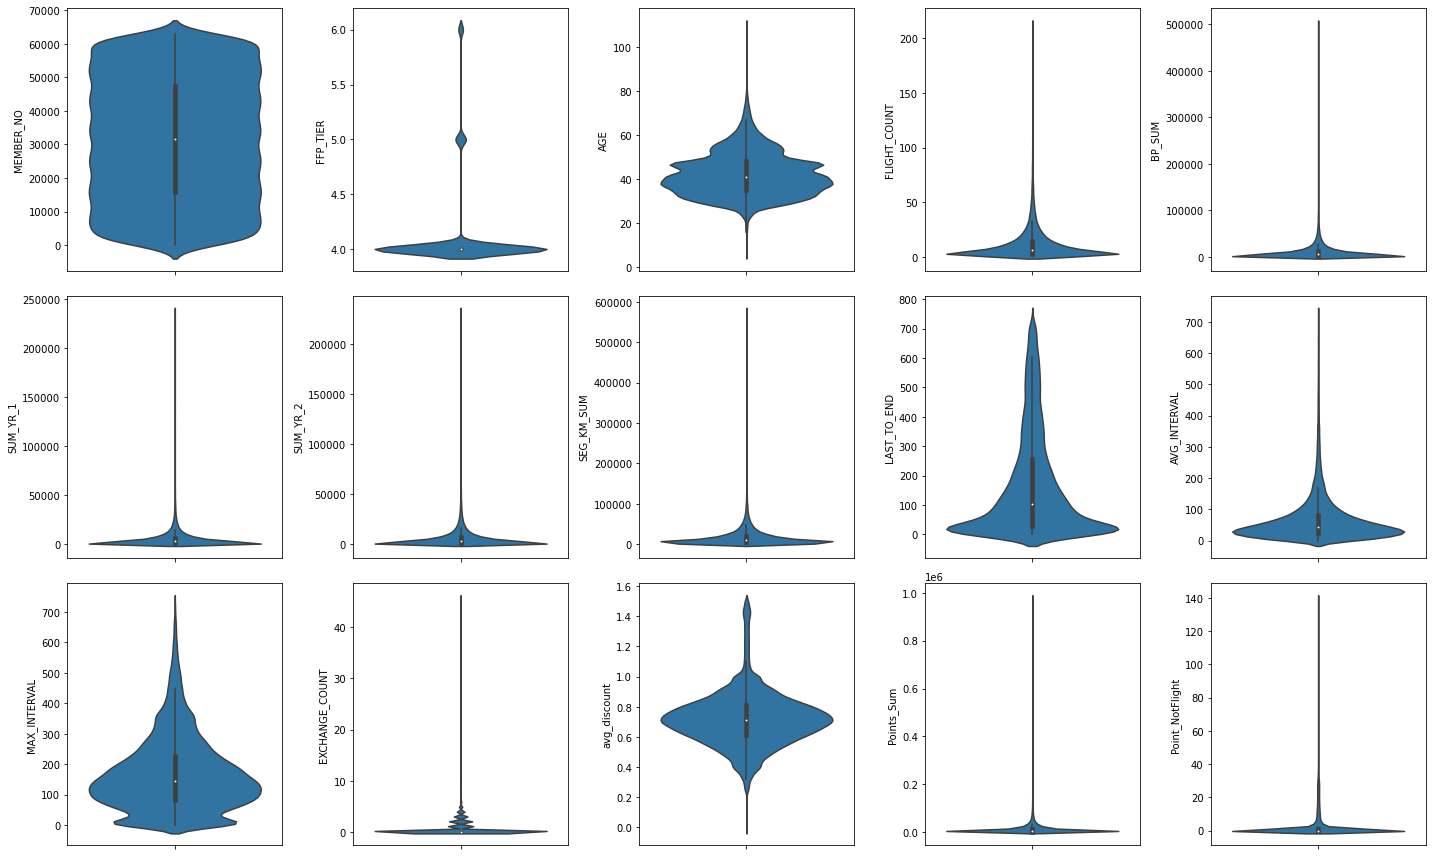

In [30]:
plt.figure(figsize=(20,12))

for x in range(0, len(num)) : 
  plt.subplot(3, round(len(num)/3), x+1)
  sns.violinplot(y=df[num[x]], orient='v')
  plt.tight_layout()
  # sns.boxplot(df[num[x]]) 
  # plt.show() 

In [31]:
filtered_entries = np.array([True] * len(df))
for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
data = df[filtered_entries]

In [32]:
num

Index(['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

<AxesSubplot:>

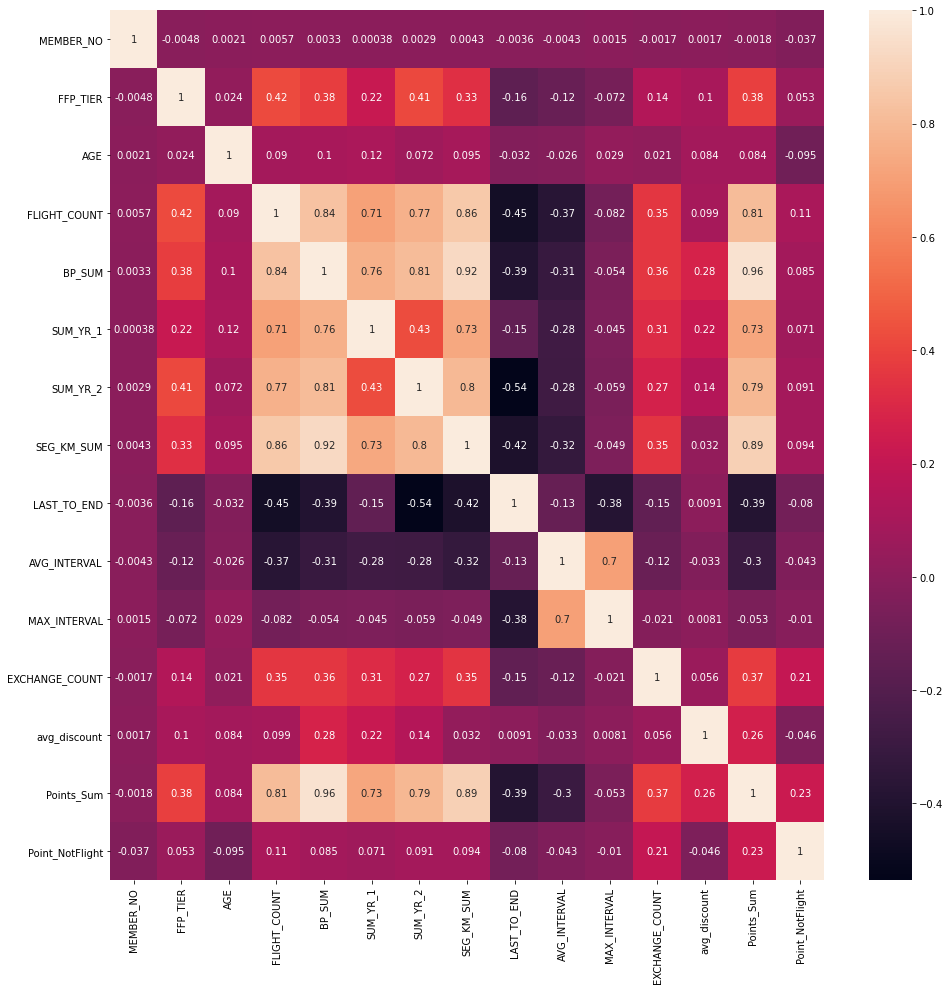

In [33]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True) 

<AxesSubplot:xlabel='SEG_KM_SUM', ylabel='FLIGHT_COUNT'>

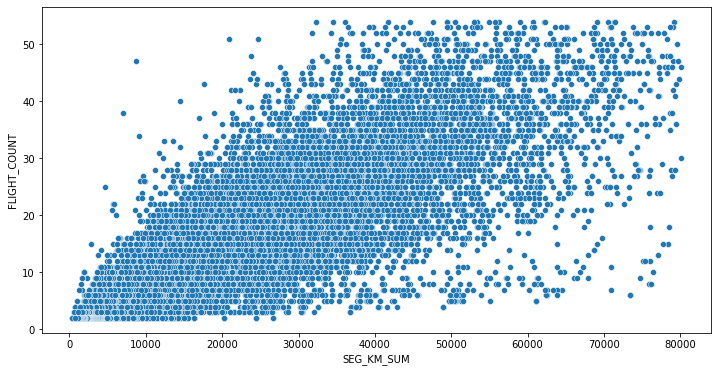

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='SEG_KM_SUM', y='FLIGHT_COUNT' , data = data) 

In [35]:
#Standardisasi 
feats = ['SEG_KM_SUM', 'FLIGHT_COUNT']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data['SEG_KM_SUM1'] = scaler.fit_transform(data[[feats[0]]])  
data['FLIGHT_COUNT1'] = scaler.fit_transform(data[[feats[1]]]) 
dfix = data[['SEG_KM_SUM1' , 'FLIGHT_COUNT1']]

<ipython-input-35-e178d2d4aa07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SEG_KM_SUM1'] = scaler.fit_transform(data[[feats[0]]])
<ipython-input-35-e178d2d4aa07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FLIGHT_COUNT1'] = scaler.fit_transform(data[[feats[1]]])


In [36]:
dfix

,SEG_KM_SUM1,FLIGHT_COUNT1
1028,4.920767,4.003193
1216,4.770912,0.321624
1305,4.960587,4.328038
1320,4.784818,2.812097
1331,4.670147,4.219756
...,...,...
62965,-1.055661,-0.869472
62968,-1.000339,-0.869472
62969,-1.000339,-0.869472
62971,-1.000339,-0.869472


In [37]:
X = dfix['SEG_KM_SUM1'] 
y = dfix['FLIGHT_COUNT1']
cluster = KMeans(n_clusters=6) 
cluster.fit_transform(dfix.values) 
cluster.labels_

array([2, 5, 2, ..., 0, 0, 0])

In [38]:
dfix['cluster'] = cluster.labels_ 

<ipython-input-38-79d8110fb9a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfix['cluster'] = cluster.labels_


In [39]:
dfix

,SEG_KM_SUM1,FLIGHT_COUNT1,cluster
1028,4.920767,4.003193,2
1216,4.770912,0.321624,5
1305,4.960587,4.328038,2
1320,4.784818,2.812097,2
1331,4.670147,4.219756,2
...,...,...,...
62965,-1.055661,-0.869472,0
62968,-1.000339,-0.869472,0
62969,-1.000339,-0.869472,0
62971,-1.000339,-0.869472,0


C:\Users\Attariq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEG_KM_SUM1', ylabel='FLIGHT_COUNT1'>

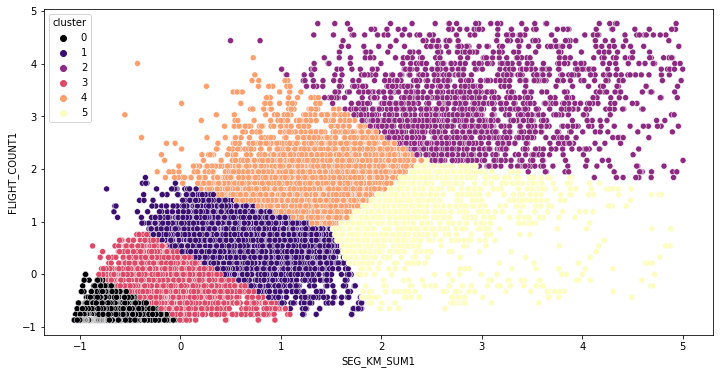

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(dfix['SEG_KM_SUM1'] , dfix['FLIGHT_COUNT1'], hue='cluster', data=dfix, palette='magma')

In [41]:
dfix[dfix['cluster']==0].describe() 

,SEG_KM_SUM1,FLIGHT_COUNT1,cluster
count,22341.000000,22341.000000,22341.0
mean,-0.722168,-0.705565,0.0
std,0.168133,0.155859,0.0
min,-1.055661,-0.869472,0.0
25%,-0.857627,-0.869472,0.0
50%,-0.740068,-0.761191,0.0
75%,-0.608299,-0.652909,0.0
max,-0.036083,-0.003221,0.0


In [42]:
dfix[dfix['cluster']==1].describe() 

,SEG_KM_SUM1,FLIGHT_COUNT1,cluster
count,7835.000000,7835.000000,7835.0
mean,0.587209,0.569545,1.0
std,0.388316,0.381299,0.0
min,-0.734064,-0.761191,1.0
25%,0.306829,0.321624,1.0
50%,0.541149,0.538187,1.0
75%,0.842835,0.863031,1.0
max,1.805723,1.837564,1.0


In [43]:
dfix[dfix['cluster']==2].describe() 

,SEG_KM_SUM1,FLIGHT_COUNT1,cluster
count,1769.000000,1769.000000,1769.0
mean,2.965155,3.226737,2.0
std,0.800823,0.700403,0.0
min,0.499202,1.837564,2.0
25%,2.373076,2.703816,2.0
50%,2.855546,3.136942,2.0
75%,3.467658,3.786630,2.0
max,5.002610,4.761163,2.0


<AxesSubplot:>

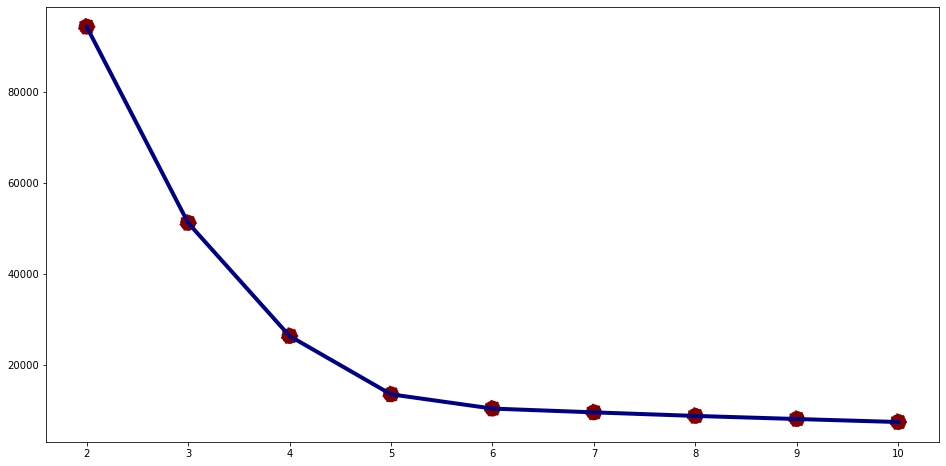

In [44]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfix.values)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(16, 8))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [45]:
data['cluster'] = cluster.labels_

<ipython-input-45-b675038c0237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = cluster.labels_


C:\Users\Attariq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEG_KM_SUM', ylabel='FLIGHT_COUNT'>

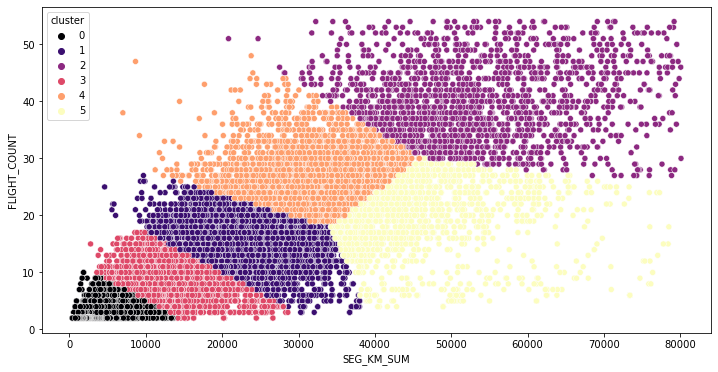

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot(data['SEG_KM_SUM'] , data['FLIGHT_COUNT'], hue='cluster', data=data, palette='magma')

In [47]:
for x in range(0,6) : 
  print('cluster , segmentasi : ' , x)
  print(data[data['cluster']==x][['SEG_KM_SUM' , 'FLIGHT_COUNT']].describe()) 
  print('') 
  print('')  

cluster , segmentasi :  0
         SEG_KM_SUM  FLIGHT_COUNT
count  22341.000000  22341.000000
mean    4756.556466      3.513719
std     2212.521074      1.439391
min      368.000000      2.000000
25%     2974.000000      2.000000
50%     4521.000000      3.000000
75%     6255.000000      4.000000
max    13785.000000     10.000000


cluster , segmentasi :  1
         SEG_KM_SUM  FLIGHT_COUNT
count   7835.000000   7835.000000
mean   21987.119847     15.289598
std     5109.993075      3.521369
min     4600.000000      3.000000
25%    18297.500000     13.000000
50%    21381.000000     15.000000
75%    25351.000000     18.000000
max    38022.000000     27.000000


cluster , segmentasi :  2
         SEG_KM_SUM  FLIGHT_COUNT
count   1769.000000   1769.000000
mean   53279.389486     39.829282
std    10538.327865      6.468355
min    20829.000000     27.000000
25%    45488.000000     35.000000
50%    51837.000000     39.000000
75%    59892.000000     45.000000
max    80091.000000     54.000000
